<a href="https://colab.research.google.com/github/rishi-analytics/ESG-Specialization-Project-Portfolio/blob/main/ESG_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ESG Data Analysis

This notebook explores ESG (Environmental, Social, and Governance) risk scores of S&P 500 companies.  
The goal is to analyze ESG risk distribution, compare sectoral performance, and identify top and bottom performers.  
The analysis reflects concepts learned in the **“ESG for All”** Coursera Specialization, connecting data insights with sustainable business principles.

## Setting the objectives for the project:
- **Objective 1**: Examine the overall ESG risk profile of companies
- **Objective 2**: Identify top and bottom ESG performers

- **Objective 3**: Compare ESG risk across sectors and ESG dimensions

## **Objective 1**
Starting off with essential libraries and initial data exploration

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("/content/SP 500 ESG Risk Ratings.csv")
df.head()

,Symbol,Name,Address,Sector,Industry,Full Time Employees,Description,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
0,ENPH,"Enphase Energy, Inc.","47281 Bayside Parkway\nFremont, CA 94538\nUnit...",Technology,Solar,"3,157","Enphase Energy, Inc., together with its subsid...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EMN,Eastman Chemical Company,"200 South Wilcox Drive\nKingsport, TN 37662\nU...",Basic Materials,Specialty Chemicals,"14,000",Eastman Chemical Company operates as a special...,25.3,12.8,6.6,5.8,Moderate Controversy Level,2.0,50th percentile,Medium
2,DPZ,Domino's Pizza Inc.,"30 Frank Lloyd Wright Drive\nAnn Arbor, MI 481...",Consumer Cyclical,Restaurants,"6,500","Domino's Pizza, Inc., through its subsidiaries...",29.2,10.6,6.3,12.2,Moderate Controversy Level,2.0,66th percentile,Medium
3,DAY,"Dayforce, Inc.","3311 East Old Shakopee Road\nMinneapolis, MN 5...",Technology,Software - Application,"9,084","Dayforce Inc., together with its subsidiaries,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DVA,Davita Inc.,"2000 16th Street\nDenver, CO 80202\nUnited States",Healthcare,Medical Care Facilities,"70,000",DaVita Inc. provides kidney dialysis services ...,22.6,0.1,8.4,14.1,Moderate Controversy Level,2.0,38th percentile,Medium


In [5]:
df.shape

(503, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  503 non-null    object 
 1   Name                    503 non-null    object 
 2   Address                 502 non-null    object 
 3   Sector                  502 non-null    object 
 4   Industry                502 non-null    object 
 5   Full Time Employees     498 non-null    object 
 6   Description             502 non-null    object 
 7   Total ESG Risk score    430 non-null    float64
 8   Environment Risk Score  430 non-null    float64
 9   Governance Risk Score   430 non-null    float64
 10  Social Risk Score       430 non-null    float64
 11  Controversy Level       430 non-null    object 
 12  Controversy Score       403 non-null    float64
 13  ESG Risk Percentile     430 non-null    object 
 14  ESG Risk Level          430 non-null    ob

In [7]:
df.isnull().sum()

,0
Symbol,0
Name,0
Address,1
Sector,1
Industry,1
Full Time Employees,5
Description,1
Total ESG Risk score,73
Environment Risk Score,73
Governance Risk Score,73


### Data Cleaning

### Missing Values
The dataset shows missing values mainly in ESG-related columns:  
- `Total ESG Risk score`, `Environment Risk Score`, `Social Risk Score`, `Governance Risk Score`, and `ESG Risk Level` → 73 missing.  
- `Controversy Score` → 100 missing.  
- Company details (`Sector`, `Industry`, `Employees`) → minimal missing entries.

### Approach
- Retain records with valid ESG scores for analysis.  
- Drop or impute minimal non-critical fields as needed.  
- Ensure data consistency and type correctness before visualization.

*Linked Concept:*  
From **Course 4 ESG Challenges and Solutions**, incomplete or inconsistent ESG data reflects real-world disclosure gaps, reinforcing the need for standardized and transparent reporting practices.


In [8]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

# Mean imputation for numeric columns
num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Mode imputation for categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

print("Missing values imputed successfully!")
print(df.isnull().sum().sum(), "missing values remain.")

Missing values imputed successfully!
0 missing values remain.


Missing values were handled using simple imputation: mean for numerical features and mode for categorical features. This approach ensures a complete dataset for subsequent ESG risk analysis while maintaining interpretability.

### Exploratory Data Analysis (EDA)

#### Goal:
Explore ESG risk distribution, understand sectoral variations, and identify companies with exceptionally high or low ESG risk.

*Linked Concept:*  
From **Course 3 – ESG Value Creation for Business Impact**, data exploration helps reveal how ESG performance contributes to competitive advantage and risk mitigation across sectors.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary stats
df[['Total ESG Risk score', 'Environment Risk Score',
    'Social Risk Score', 'Governance Risk Score']].describe()

,Total ESG Risk score,Environment Risk Score,Social Risk Score,Governance Risk Score
count,503.000000,503.000000,503.000000,503.000000
mean,21.533721,5.739767,9.070465,6.725116
std,6.368602,4.707617,3.381516,2.041233
min,7.100000,0.000000,0.800000,3.000000
25%,16.900000,2.000000,7.200000,5.400000
50%,21.533721,5.300000,9.070465,6.600000
75%,25.150000,8.000000,10.800000,7.400000
max,41.700000,25.000000,22.500000,19.400000


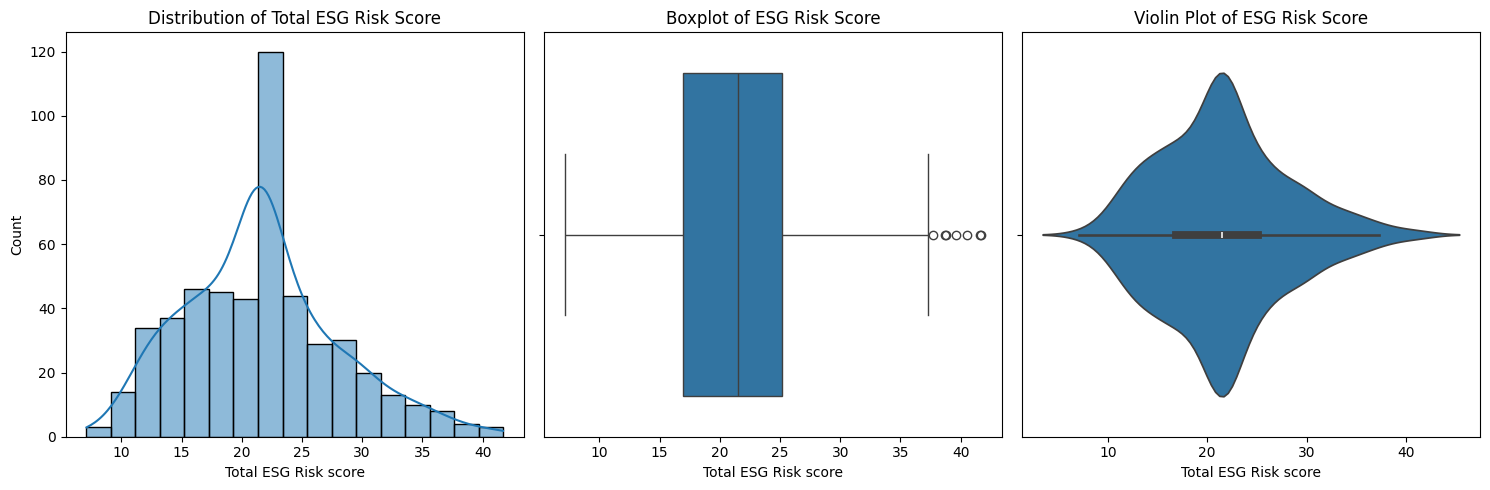

In [10]:
# Distribution plots
fig, axes = plt.subplots(1, 3, figsize=(15,5))

sns.histplot(df['Total ESG Risk score'], kde=True, ax=axes[0])
axes[0].set_title("Distribution of Total ESG Risk Score")

sns.boxplot(x=df['Total ESG Risk score'], ax=axes[1])
axes[1].set_title("Boxplot of ESG Risk Score")

sns.violinplot(x=df['Total ESG Risk score'], ax=axes[2])
axes[2].set_title("Violin Plot of ESG Risk Score")

plt.tight_layout()
plt.show()#

### Interpretation of ESG Risk Score Plots

1. Histogram (Left)
- Most companies have ESG risk scores between **15–25**
- The curve is slightly **right-skewed**, meaning a few firms have higher risk scores
- Overall, the majority show **moderate risk**

2. Boxplot (Middle)
- The **median** lies around **20–22**, showing a central tendency in that range
- **Outliers** appear above 35, representing companies with unusually high ESG risk
- The spread indicates **some variation**, but not extreme

3. Violin Plot (Right)
- Confirms the **peak density** around 20–25.  
- The shape shows that most firms cluster in mid-range scores, with fewer on both low and high ends

### Summary
The ESG risk scores are **mostly moderate**, with a small number of firms facing **high risk**.  
The distribution is **slightly right-skewed**, suggesting occasional high-risk outliers.

The distribution helps identify how companies are spread across ESG risk levels.
A left-skewed pattern may indicate more companies with low risk (strong ESG performance), while a right-skewed one signals higher ESG risks dominating the dataset.

Linked Concept:
From Course 1 – ESG Essentials for Sustainable Business, understanding overall ESG distribution reflects how corporate practices align (or fail to align) with sustainable standards.

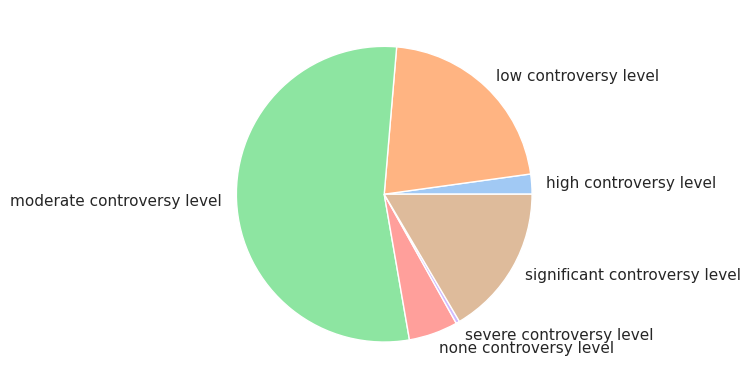

In [18]:
# @title Controversy Level (Let'c check distribution of companies across controvery level)
df.groupby('Controversy Level').size().plot(kind='pie', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

So most of the companies have controversy level score under the `moderate controvery level` category. The next two are: `low controversy level` and `significant controversy level`.

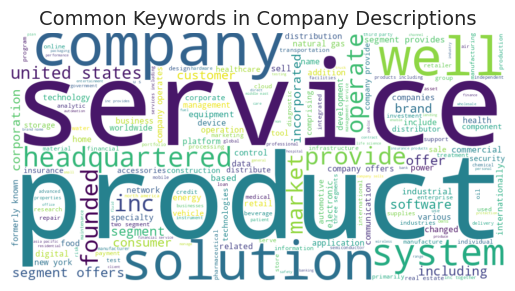

In [27]:
#@title Implementing a light NLP feature extraction step: WORD CLOUD
from wordcloud import WordCloud
text = " ".join(df['Description'].dropna())
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Keywords in Company Descriptions', fontsize=14)
plt.show()

The word cloud highlights common terms in company descriptions. Frequent words like service, product, solutions, and system show how companies emphasize their core operations, while words such as headquartered, founded, and provide reflect standard corporate context. From an ESG perspective, this visualization connects to ESG Communication for Inclusive Dialogue, illustrating how companies present themselves publicly, and which operational or strategic aspects they prioritize when communicating their ESG identity.

## **Objective 2**

### Top and Bottom ESG Performers

### Goal
Identify companies with the strongest and weakest ESG performance to understand leadership and lag in sustainability practices.

*Linked Concept:*  
From **Course 6 How to Prioritize ESG Initiatives**, benchmarking top and bottom performers helps organizations identify improvement areas and prioritize impactful ESG initiatives.


In [23]:
# Top 10 companies with lowest (best) ESG risk
top_esg = df.sort_values(by='Total ESG Risk score', ascending=True).head(10)

# Bottom 10 companies with highest (worst) ESG risk
bottom_esg = df.sort_values(by='Total ESG Risk score', ascending=False).head(10)

top_esg[['Name', 'Sector', 'Total ESG Risk score']]

,Name,Sector,Total ESG Risk score
288,"hasbro, inc.",consumer cyclical,7.1
240,"keysight technologies, inc.",technology,7.6
409,"cbre group, inc.",real estate,8.0
408,cdw corporation,technology,9.2
451,"avalonbay communities, inc.",real estate,9.8
498,accenture plc,technology,9.8
371,crown castle inc.,real estate,10.1
137,"prologis, inc.",real estate,10.3
69,"the interpublic group of companies, inc.",communication services,10.3
462,aptiv plc,consumer cyclical,10.7


/tmp/ipython-input-3484084034.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Name', x='Total ESG Risk score', data=top_esg, ax=axes[0], palette='Greens_r')
/tmp/ipython-input-3484084034.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Name', x='Total ESG Risk score', data=bottom_esg, ax=axes[1], palette='Reds')


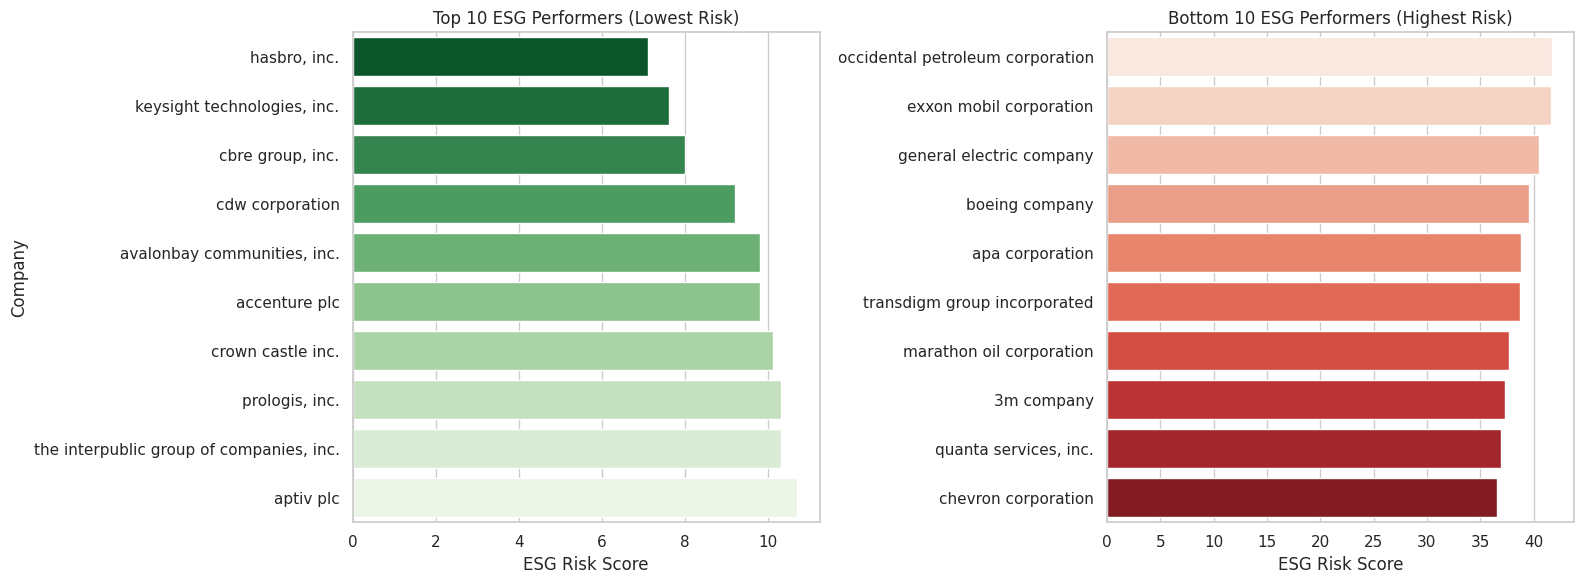

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Top performers (low risk)
sns.barplot(y='Name', x='Total ESG Risk score', data=top_esg, ax=axes[0], palette='Greens_r')
axes[0].set_title("Top 10 ESG Performers (Lowest Risk)")
axes[0].set_xlabel("ESG Risk Score")
axes[0].set_ylabel("Company")

# Bottom performers (high risk)
sns.barplot(y='Name', x='Total ESG Risk score', data=bottom_esg, ax=axes[1], palette='Reds')
axes[1].set_title("Bottom 10 ESG Performers (Highest Risk)")
axes[1].set_xlabel("ESG Risk Score")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

### Interpretation of Top and Bottom ESG Performers

This chart compares the **top 10** and **bottom 10** companies based on their **ESG risk scores**.  
- **Lower scores** indicate **better ESG performance** (lower risk)
- **Higher scores** indicate **poorer ESG performance** (higher risk)

#### Top 10 ESG Performers (Lowest Risk)
- **Hasbro, Inc.**, **Keysight Technologies, Inc.**, and **Cbre Group, Inc** are the best ESG performers with the **lowest risk scores (around 7–9)**
- These companies likely maintain strong sustainability practices and lower exposure to ESG-related risks.  
- Overall, the top 10 firms show **ESG scores below 10**, representing **very low risk** profiles

#### Bottom 10 ESG Performers (Highest Risk)
- **Occidental Petroleum Corporation**, **Exxon Mobil Corporation**, and **General Electric Company** are among the **highest-risk** companies, with scores close to **40**
- Most bottom performers belong to **energy, manufacturing, or industrial** sectors, known for higher environmental and social risks  
- These firms face **significant exposure to ESG challenges**, such as emissions, safety, and governance issues

#### Summary
- The **best performers** are concentrated in **technology, real estate, and services**, reflecting more sustainable business models.  
- The **worst performers** are primarily **energy and heavy industrial** firms, where operational and environmental risks are highest.  
- The gap between top and bottom performers highlights a **strong variation in ESG practices across sectors**.


##**Objective 3**


###  ESG Dimension-wise Comparison Across Sectors

### Goal:
Compare Environmental, Social, and Governance (E, S, G) risk dimensions across sectors to understand which sustainability pillar drives sectoral performance.

*Linked Concept:*  
From **Course 3 – ESG Value Creation for Business Impact**, analyzing E, S, and G dimensions separately helps businesses identify which area contributes most to their overall ESG risk and where improvement efforts should focus.

In [25]:
# Calculate mean of each ESG dimension by sector
esg_dimensions = (
    df.groupby('Sector')[['Environment Risk Score', 'Social Risk Score', 'Governance Risk Score']]
    .mean()
    .reset_index()
)

esg_dimensions.head()

,Sector,Environment Risk Score,Social Risk Score,Governance Risk Score
0,basic materials,11.678150,7.750518,6.589789
1,communication services,3.269006,9.752896,7.163679
2,consumer cyclical,5.346291,8.460049,5.676328
3,consumer defensive,8.483870,10.689205,5.938204
4,energy,15.908161,8.938224,6.515920


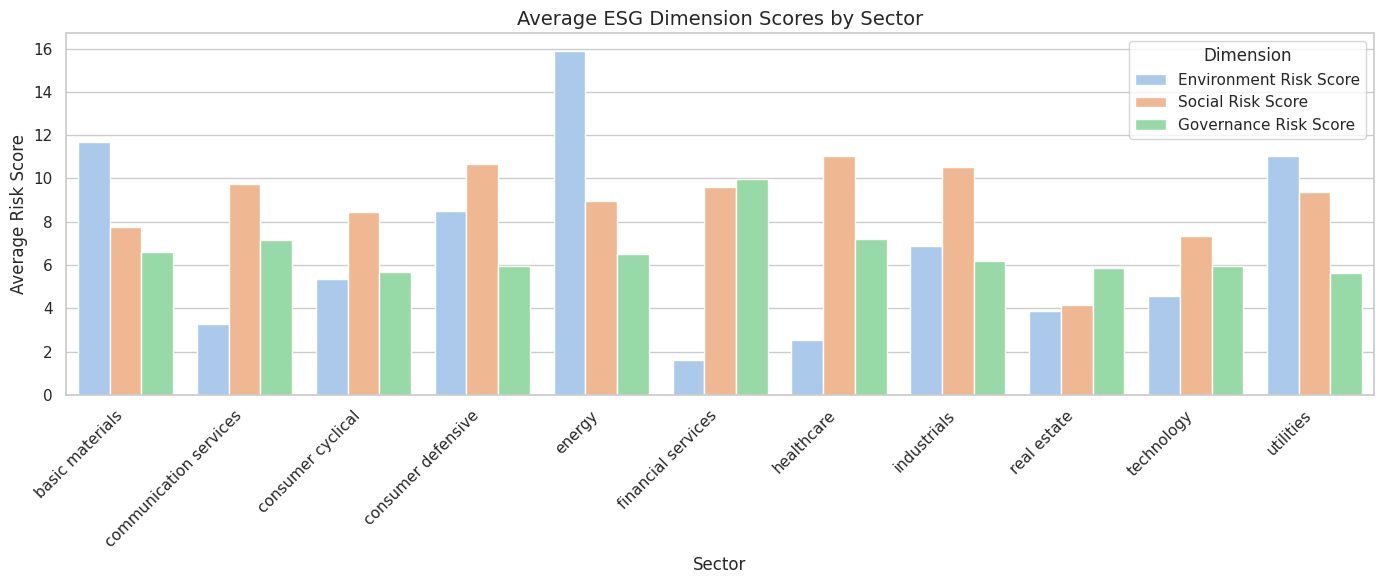

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set visual theme
sns.set(style="whitegrid", palette="pastel")

# Prepare data
sector_esg = df.groupby('Sector')[['Environment Risk Score',
                                   'Social Risk Score',
                                   'Governance Risk Score']].mean().reset_index()

# Melt for easier plotting
sector_melted = sector_esg.melt(id_vars='Sector',
                                var_name='Dimension',
                                value_name='Average Score')

# Plot grouped bar chart
plt.figure(figsize=(14,6))
sns.barplot(data=sector_melted, x='Sector', y='Average Score', hue='Dimension')
plt.xticks(rotation=45, ha='right')
plt.title('Average ESG Dimension Scores by Sector', fontsize=14)
plt.xlabel('Sector')
plt.ylabel('Average Risk Score')
plt.tight_layout()
plt.show()

### Interpretation of Average ESG Dimension Scores by Sector

### Overview
The chart compares **Environmental**, **Social**, and **Governance** risk scores across various industry sectors. Higher values indicate greater risk exposure within that ESG dimension.

### Key Observations

#### 1. Environmental Risk
- **Energy** and **Utilities** sectors show the **highest environmental risk**, reflecting their dependence on natural resources and emissions intensity--> air pollution
- **Financial Services** and **Healthcare** have **very low environmental risk**, as their operations are less resource-intensive

#### 2. Social Risk
- **Healthcare**, **Communication Services**, and **Industrials** exhibit **high social risk**, possibly due to workforce, safety, and customer-related concerns  
- **Real Estate** and **Technology** show **lower social risk** levels

#### 3. Governance Risk
- Governance risk scores are **moderate and consistent** across most sectors, typically ranging between 6–8
- **Healthcare** stands out with a **slightly higher governance risk**, while **Real Estate** shows a **lower** one

### Summary
- **Energy** and **Utilities** are the most environmentally risky sectors
- **Social risk** varies the most across industries, highlighting sector-specific human and societal factors
- **Governance risk** remains relatively stable across sectors  
- Overall, **Energy** and **Healthcare** face the most comprehensive ESG challenges

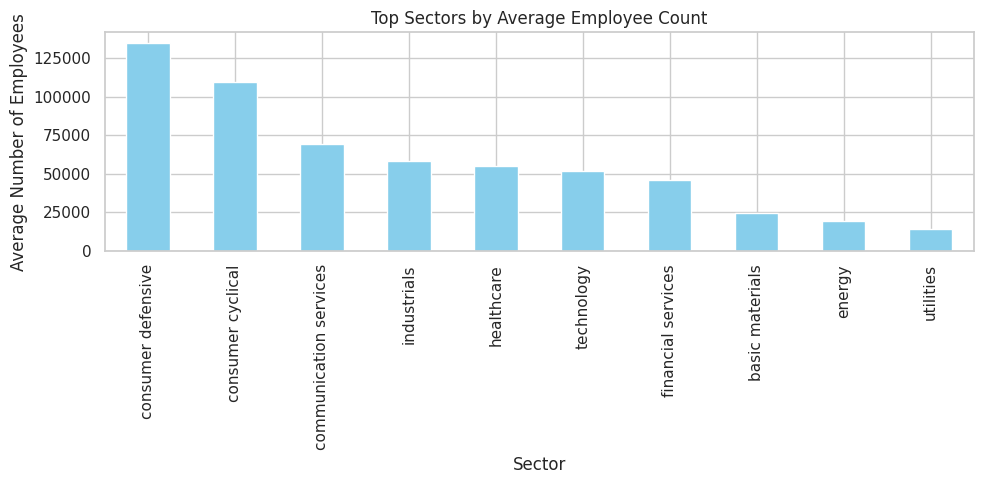

In [29]:
#@title Plotting employees count by sector:
# Clean 'Full Time Employees' column
df['Full Time Employees'] = (
    df['Full Time Employees']
    .astype(str)              # ensure all values are strings
    .str.replace(',', '', regex=False)  # remove commas
    .replace('nan', None)     # handle string 'nan'
    .astype(float)            # convert to numeric
)
df.groupby('Sector')['Full Time Employees'].mean().sort_values(ascending=False)

sector_emp = df.groupby('Sector')['Full Time Employees'].mean().sort_values(ascending=False).head(10)
sector_emp.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title('Top Sectors by Average Employee Count')
plt.ylabel('Average Number of Employees')
plt.tight_layout()
plt.show()

This bar chart shows the average number of employees across sectors. Consumer-related sectors (e.g., food, household goods, retail, automotive) employ the most people, while utilities and energy employ the least. From an ESG perspective, the Social factor is particularly relevant: larger workforces indicate sectors where initiatives related to employee welfare, diversity, health and safety, and community engagement can have broader impact. This ties directly to ESG Mindsets for Business Transformation by highlighting sectors with higher potential for positive social outcomes and organizational sustainability influence.

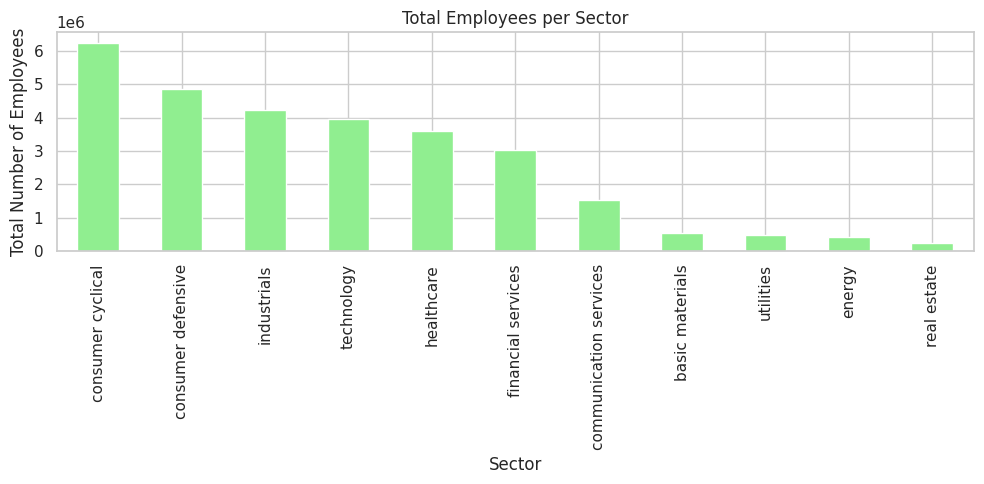

In [31]:
# --- Plot Total Employees ---
plt.figure(figsize=(10,5))
sector_total.plot(kind='bar', color='lightgreen')
plt.title('Total Employees per Sector')
plt.ylabel('Total Number of Employees')
plt.tight_layout()
plt.show()

- Average Employees Plot → shows typical company size in each sector, useful for comparing sectors fairly.

- Total Employees Plot → shows absolute workforce, highlighting sectors where ESG social initiatives can impact the largest number of people.

- Both tie to the Social factor in ESG, emphasizing employee welfare, workforce influence, and social responsibility.

# ESG Data Analysis — Project Summary

## Objective 1: Examine Overall ESG Risk Profile
- **Data Exploration & Cleaning:** Loaded, cleaned, and imputed missing values.
- **Total ESG Risk Score Distribution:**
  - Most companies between 15–25; right-skewed with some high-risk outliers.
  - Moderate ESG risk dominates; few firms have high risk.
- **Controversy Level:** Most companies fall under moderate controversy.
- **Word Cloud:** Frequent terms (*service, product, solutions*) highlight company focus; links to **ESG Communication for Inclusive Dialogue** (Course 2).
- **ESG Concept:** Overall distribution reflects alignment with sustainable business practices (**Course 1**).

## Objective 2: Identify Top and Bottom ESG Performers
- **Top 10 Companies:** Hasbro, Keysight Technologies, CBRE Group (~7–9 risk score); low ESG exposure; tech, real estate, services.
- **Bottom 10 Companies:** Occidental Petroleum, Exxon Mobil, General Electric (~40 risk score); high ESG exposure; energy, manufacturing, industrials.
- **Insight:** Highlights sectoral gaps; benchmarking aids prioritizing ESG initiatives (**Course 6**).

## Objective 3: Compare ESG Risk Across Sectors and Dimensions
- **ESG Dimension Comparison:**
  - **Environmental:** Highest in Energy & Utilities; lowest in Financial & Healthcare.
  - **Social:** High in Healthcare, Communication Services, Industrials; lower in Real Estate & Technology.
  - **Governance:** Moderate & stable; slightly higher in Healthcare.
  - **Course Link:** ESG pillars reveal sector-specific risk drivers (**Course 3**).
- **Workforce Analysis:**
  - Average & total employees by sector highlight potential social impact of initiatives.
  - Larger workforces → greater opportunity for social ESG improvements (**Course 5**).

## Overall Insights
- ESG risk is mostly moderate; high-risk outliers exist.
- Top performers are in lower-risk sectors; bottom performers in higher-risk industries.
- Environmental & Social risks vary by sector; Governance is stable.
- Workforce insights emphasize **Social factor** opportunities for employee welfare and community impact.

**Conclusion:**  
The analysis integrates **data-driven insights** with ESG specialization learnings, guiding benchmarking, prioritization, and targeted initiatives for meaningful sustainability impact.
